ACF and PACF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data

In [9]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [10]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [11]:
#rename columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [12]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)
df_ice_cream.head(2)

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605


In [13]:
#set date as index
df_ice_cream.set_index('date', inplace=True)  #for plotting

In [15]:
#just get data from 2010 onwards (as it has data from1972) 
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [16]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [17]:
df_ice_cream.tail(3)

,production
date,
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


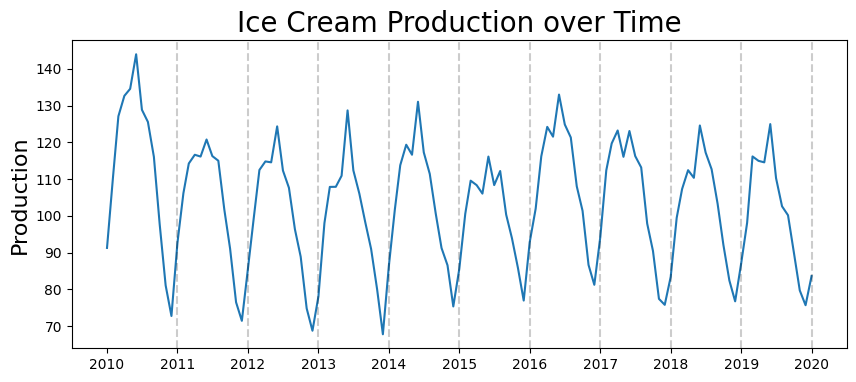

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)  #adds the vertical line on Jan 1st of each year
    #alpha is transparency, 

The chart follows some pattern. A peak every year, maybe during summer months. And maybe, in 2015, the summer was not very hot. 

# ACF

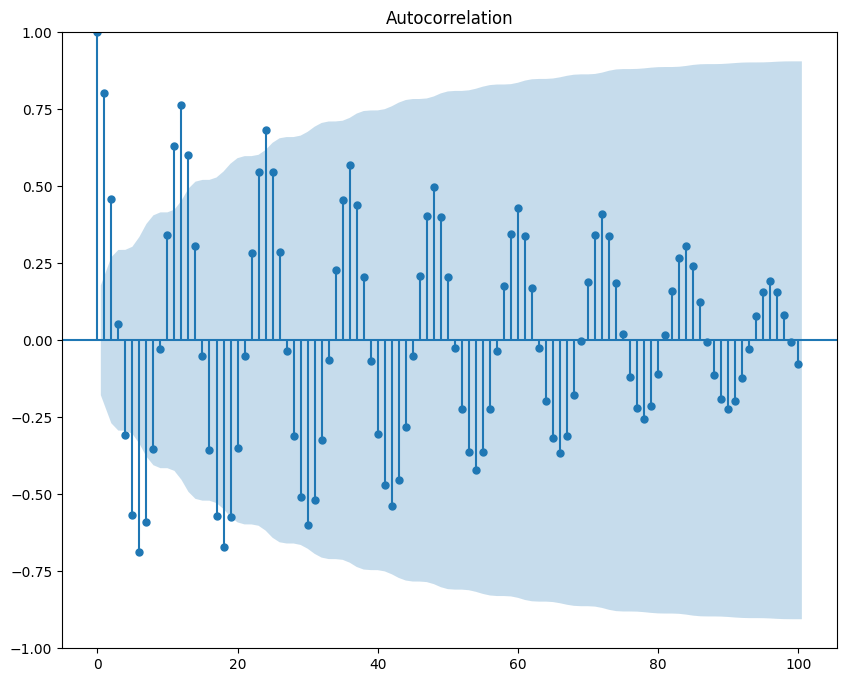

In [24]:
acf_plot = plot_acf(df_ice_cream.production, lags= 100)
acf_plot.figure.set_size_inches(10, 8)

The blue bands are the error bands. anything within them are not statistically significant. 
From, 30, they are not significant 
### Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

C:\Users\prasa\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


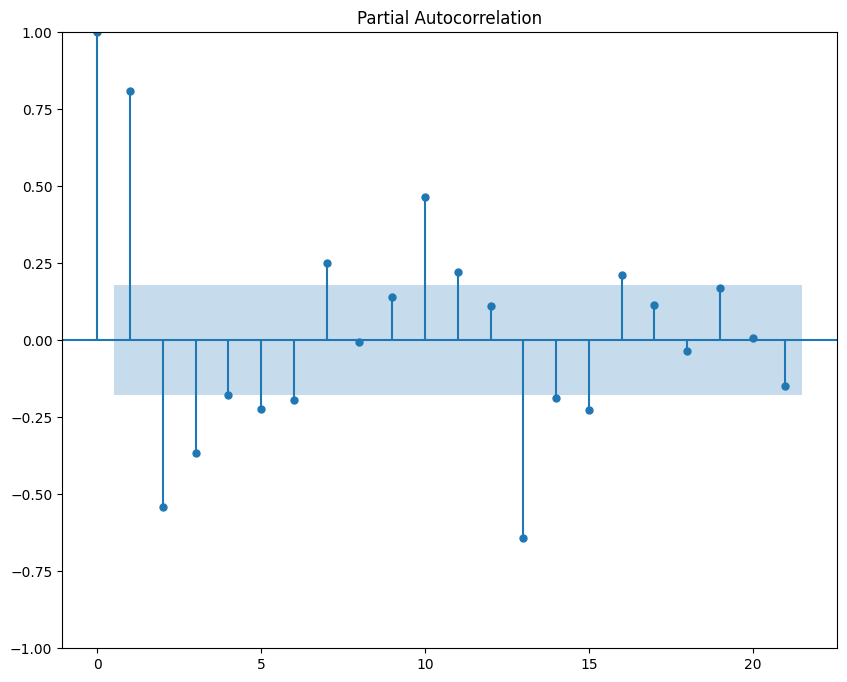

In [25]:
pacf_plot = plot_pacf(df_ice_cream.production)
pacf_plot.figure.set_size_inches(10, 8)

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13 ( at these points, we have peaks)

# On stock data

In [27]:
import yfinance as yf

In [28]:
#define the ticker symbol
tickerSymbol = 'SPY'
#considering top 500 companies


In [29]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [30]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [31]:
tickerDf = tickerDf[['Close']]  # get closing price of the stock 

In [32]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,173.704941
2015-01-05 00:00:00-05:00,170.567841
2015-01-06 00:00:00-05:00,168.961319
2015-01-07 00:00:00-05:00,171.066803
2015-01-08 00:00:00-05:00,174.102386


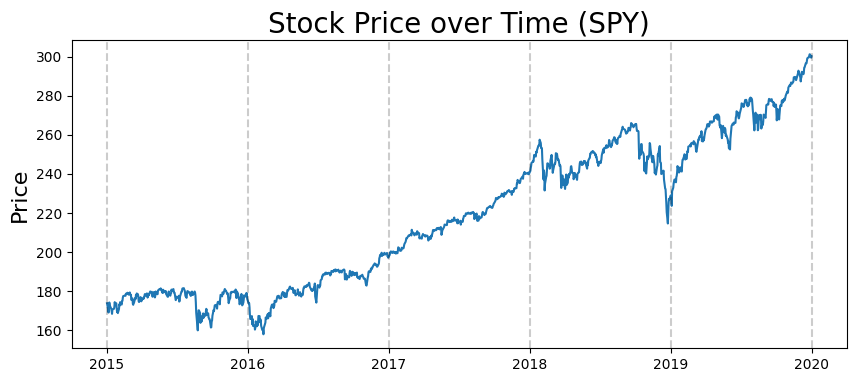

In [33]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

The chart has an upward trend. It is not stationary. It is not suited for plotting ACF and PACF 
### Stationarity: take first difference of this series

In [34]:
#take first difference, price tmw - price today 
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [35]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [36]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,173.704941,-3.137100
2015-01-05 00:00:00-05:00,170.567841,-1.606522
2015-01-06 00:00:00-05:00,168.961319,2.105484
2015-01-07 00:00:00-05:00,171.066803,3.035583
2015-01-08 00:00:00-05:00,174.102386,-1.395172


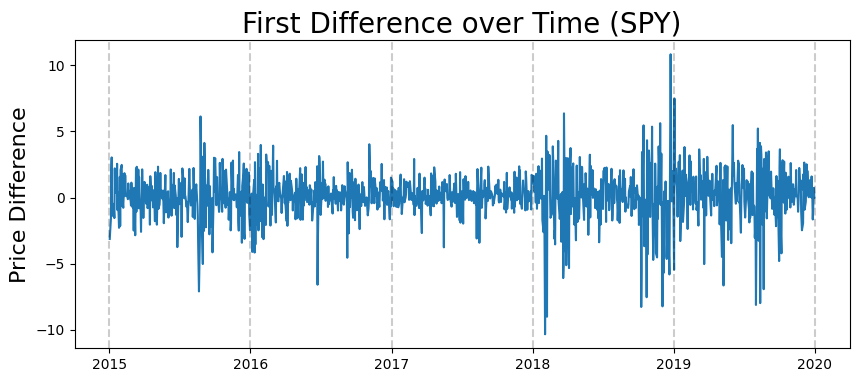

In [37]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

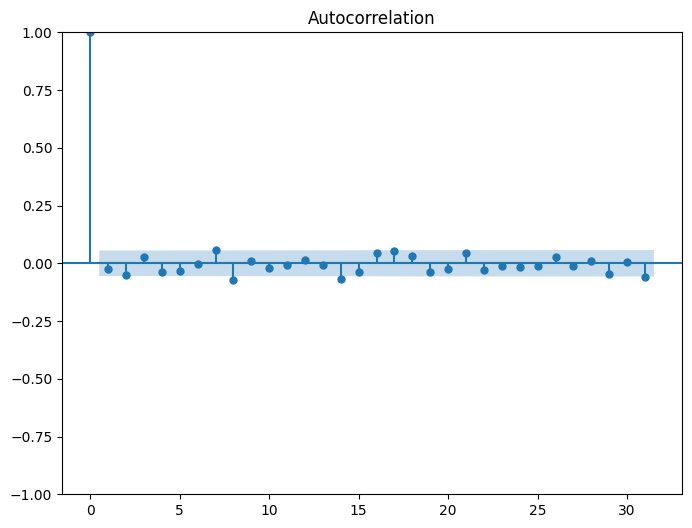

In [39]:
acf_plot = plot_acf(tickerDf.FirstDifference)
acf_plot.figure.set_size_inches(8, 6)

### ACF isn't that informative. it is not clear from the chart 

# PACF

C:\Users\prasa\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


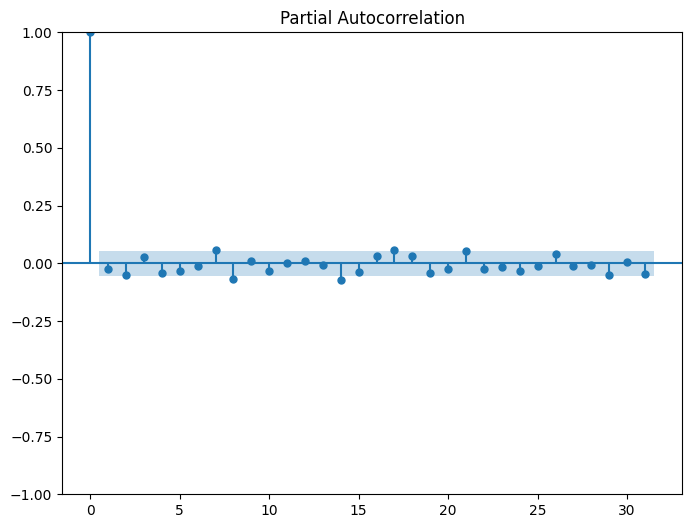

In [40]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)
pacf_plot.figure.set_size_inches(8, 6)

### PACF also doesn't tell us much

## Nvidia Analysis 

In [43]:
import yfinance as yf
nvidia_data = yf.Ticker(ticker = "NVDA")
nvidia_df = nvidia_data.history(period='1d', start='2022-1-1', end='2024-08-08')

In [44]:
nvidia_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,29.770095,30.664746,29.740140,30.075634,391547000,0.0,0.0
2022-01-04 00:00:00-05:00,30.231397,30.422109,28.306301,29.245884,527154000,0.0,0.0
2022-01-05 00:00:00-05:00,28.905399,29.371697,27.491533,27.562426,498064000,0.0,0.0
2022-01-06 00:00:00-05:00,27.598367,28.395166,27.024235,28.135557,454186000,0.0,0.0
2022-01-07 00:00:00-05:00,28.098610,28.379187,27.016241,27.205956,409939000,0.0,0.0


In [45]:
nvidia_df = nvidia_df[["Close"]]
nvidia_df.head(3)

,Close
Date,
2022-01-03 00:00:00-05:00,30.075634
2022-01-04 00:00:00-05:00,29.245884
2022-01-05 00:00:00-05:00,27.562426


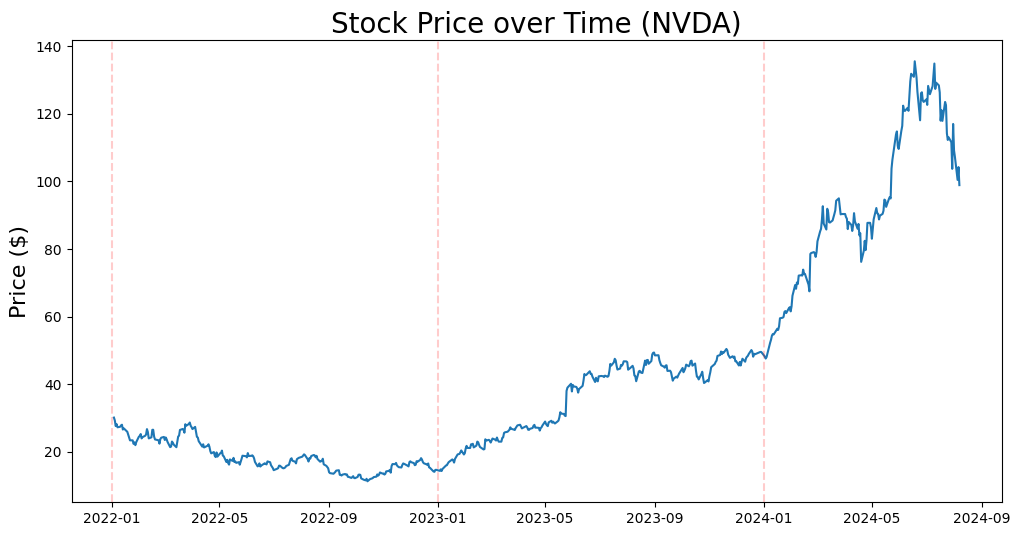

In [49]:
plt.figure(figsize=(12,6))
plt.plot(nvidia_df.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price ($)', fontsize=16)
for year in range(2022,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='red', linestyle='--', alpha=0.2)

In [50]:
first_diffs = nvidia_df.Close.values[1:] - nvidia_df.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [51]:
#set first difference as variable in dataframe
nvidia_df['FirstDifference'] = first_diffs
nvidia_df.head()


,Close,FirstDifference
Date,,
2022-01-03 00:00:00-05:00,30.075634,-0.829750
2022-01-04 00:00:00-05:00,29.245884,-1.683458
2022-01-05 00:00:00-05:00,27.562426,0.573132
2022-01-06 00:00:00-05:00,28.135557,-0.929602
2022-01-07 00:00:00-05:00,27.205956,0.152775


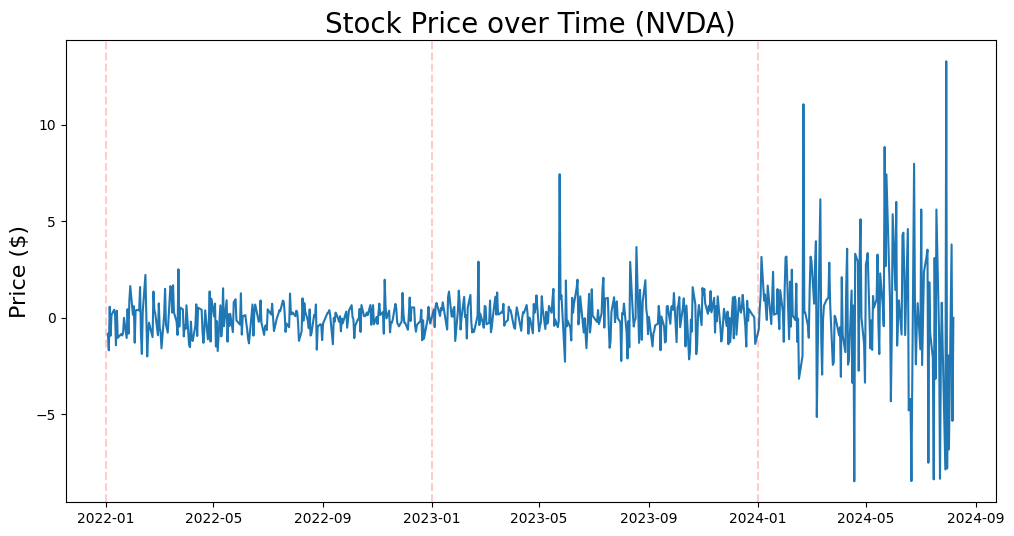

In [52]:
plt.figure(figsize=(12,6))
plt.plot(nvidia_df.FirstDifference)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price ($)', fontsize=16)
for year in range(2022,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='red', linestyle='--', alpha=0.2)

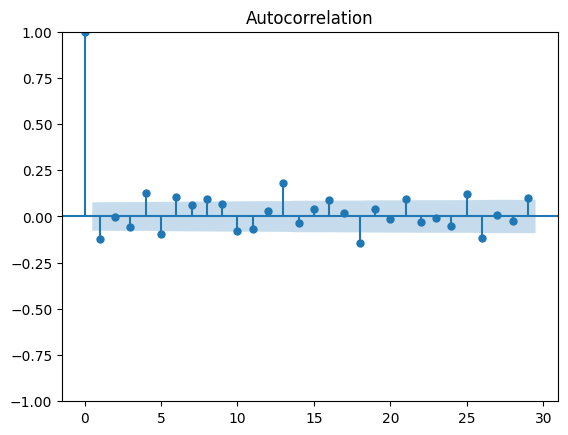

In [53]:
acf_plot = plot_acf(nvidia_df.FirstDifference)

### ACF isn't that informative, except for few points around 13, 18

C:\Users\prasa\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


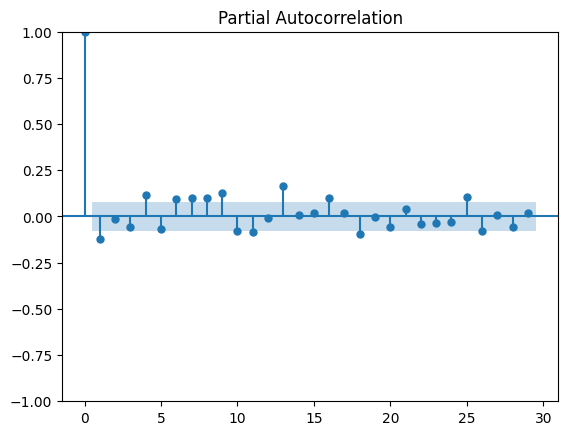

In [54]:
pacf_plot = plot_pacf(nvidia_df.FirstDifference)

PACF also is similar to ACF. Just few significant points around 1, 13